In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [ ]:
x_train.dtype,x_test.dtype,y_train.dtype,y_test.dtype

(dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('uint8'))

In [ ]:
x_valid,x_train=x_train[:4000],x_train[4000:]/255
y_valid,y_train=y_train[:4000],y_train[4000:]
x_test=x_test/255

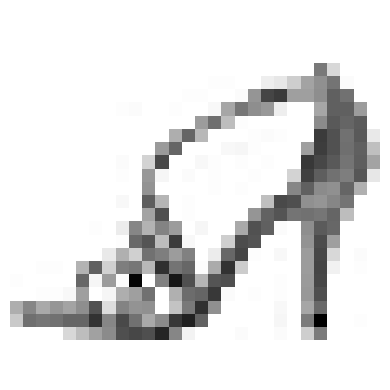

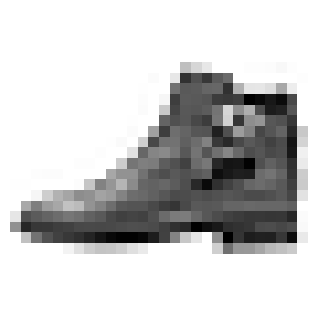

In [22]:
plt.figure(figsize=(15,4))
plotnumber=1
for i in range(2):
    if plotnumber<=2:
       ax=plt.subplot(1,2,plotnumber)
       plt.imshow(x_train[i],cmap='binary')
       plt.axis('off')
    plotnumber+=1
    plt.tight_layout()
    plt.show()

In [23]:
y_train

array([5, 9, 5, ..., 3, 0, 5], dtype=uint8)

In [27]:
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [29]:
class_names[y_train[0]],class_names[y_train[1]]

('Sandal', 'Ankle boot')

In [30]:
x_valid.shape

(4000, 28, 28)

In [31]:
x_test.shape

(10000, 28, 28)

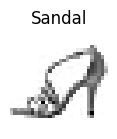

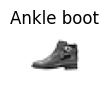

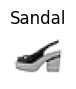

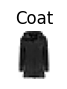

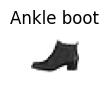

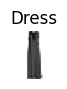

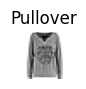

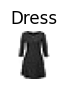

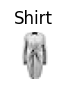

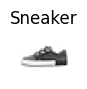

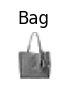

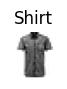

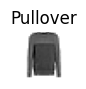

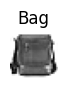

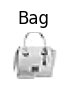

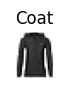

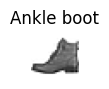

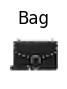

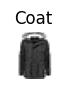

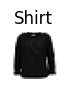

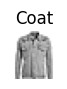

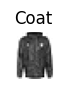

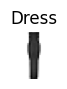

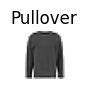

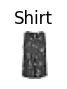

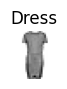

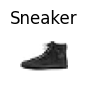

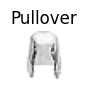

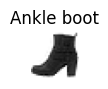

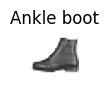

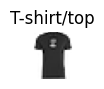

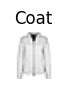

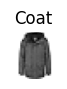

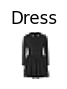

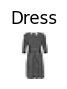

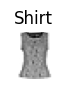

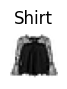

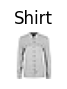

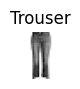

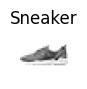

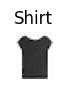

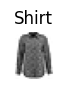

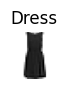

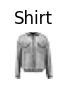

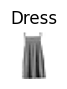

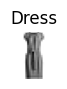

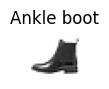

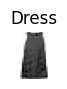

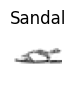

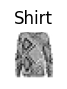

<Figure size 640x480 with 0 Axes>

In [35]:
plt.figure(figsize=(15,6))
plotnumber=1
for i in range(51):
    if plotnumber<=50:
      ax=plt.subplot(5,10,plotnumber)
      plt.imshow(x_train[i],cmap='binary')
      plt.axis('off')
      plt.title(class_names[y_train[i]],fontdict={'fontsize':12,'color':'black'})
    plotnumber+=1
    plt.tight_layout()
    plt.show()

In [37]:
model=keras.models.Sequential([
   keras.layers.Flatten(input_shape=[28,28]),
   keras.layers.Dense(100,activation='relu'),
   keras.layers.Dense(70,activation='relu'),
   keras.layers.Dense(50,activation='relu'),
   keras.layers.Dense(20,activation='relu'),
   keras.layers.Dense(10,activation='relu')])


In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 70)                7070      
                                                                 
 dense_7 (Dense)             (None, 50)                3550      
                                                                 
 dense_8 (Dense)             (None, 20)                1020      
                                                                 
 dense_9 (Dense)             (None, 10)                210       
                                                                 
Total params: 90,350
Trainable params: 90,350
Non-trai

In [41]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [54]:
model_history=model.fit(x_train,y_train,validation_data=(x_valid,y_valid),epochs=50)

Epoch 1/50
1625/1625 [==============================] - 7s 4ms/step - loss: 2.3026 - accuracy: 0.1010 - val_loss: 11.0252 - val_accuracy: 0.1018
Epoch 2/50
1625/1625 [==============================] - 11s 7ms/step - loss: 2.3026 - accuracy: 0.1010 - val_loss: 11.0252 - val_accuracy: 0.1018
Epoch 3/50
1625/1625 [==============================] - 11s 7ms/step - loss: 2.3026 - accuracy: 0.1010 - val_loss: 11.0252 - val_accuracy: 0.1018
Epoch 4/50
1625/1625 [==============================] - 8s 5ms/step - loss: 2.3026 - accuracy: 0.1010 - val_loss: 11.0252 - val_accuracy: 0.1018
Epoch 5/50
1625/1625 [==============================] - 5s 3ms/step - loss: 2.3026 - accuracy: 0.1010 - val_loss: 11.0252 - val_accuracy: 0.1018
Epoch 6/50
1625/1625 [==============================] - 6s 4ms/step - loss: 2.3026 - accuracy: 0.1010 - val_loss: 11.0252 - val_accuracy: 0.1018
Epoch 7/50
1625/1625 [==============================] - 7s 4ms/step - loss: 2.3026 - accuracy: 0.1010 - val_loss: 11.0252 - val_

In [55]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1000


[2.30259108543396, 0.10000000149011612]

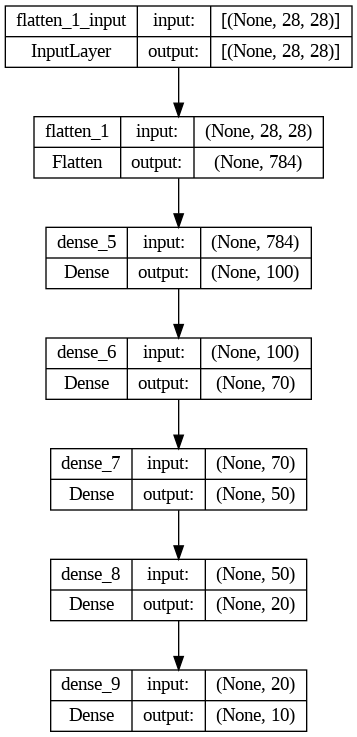

In [56]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

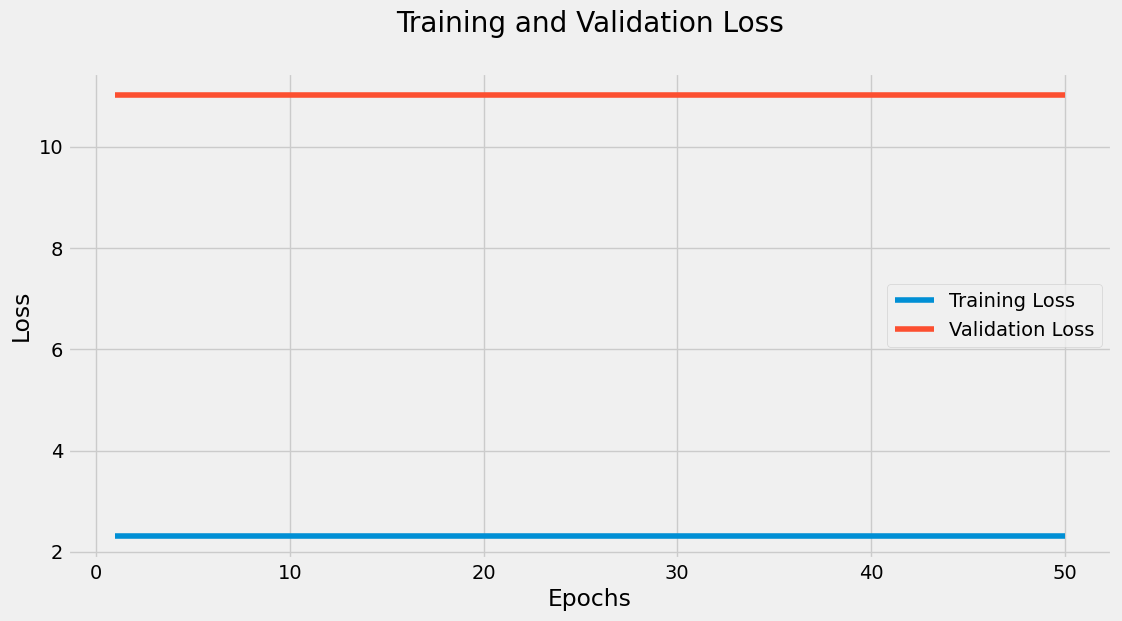

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the model history with 'loss' and 'val_loss'
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epoch = range(1, 51)

plt.figure(figsize=(12, 6))
plt.style.use('fivethirtyeight')
sns.lineplot(x=epoch, y=train_loss, label='Training Loss')
sns.lineplot(x=epoch, y=val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.title('Training and Validation Loss\n')
plt.show()


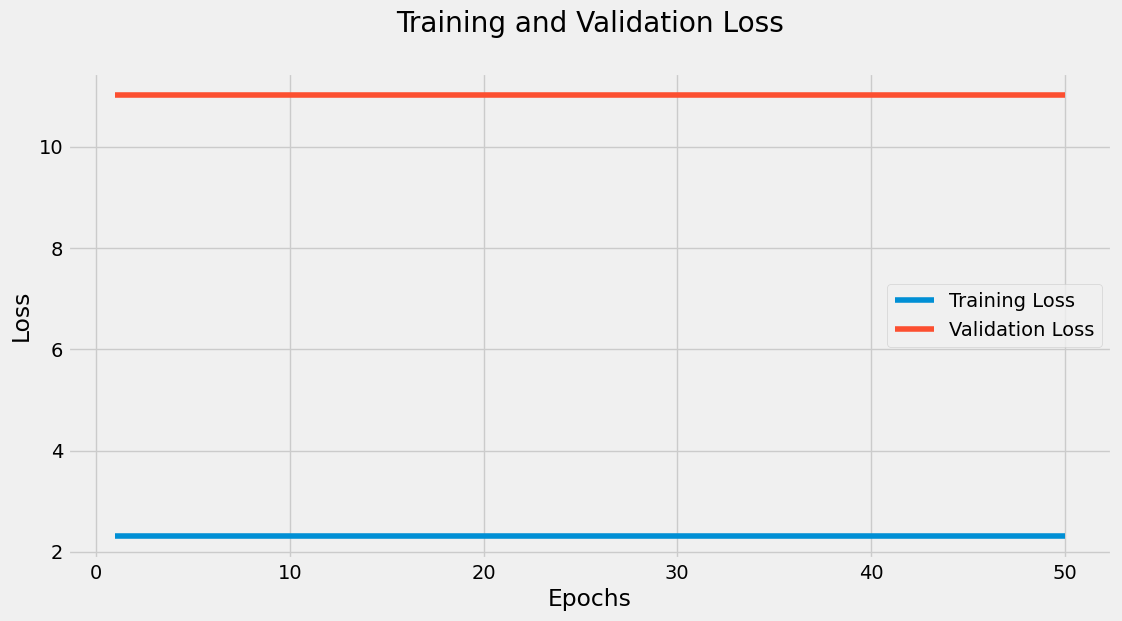

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the model history with 'loss' and 'val_loss'
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epoch = range(1, 51)
plt.figure(figsize=(12, 6))
plt.style.use('fivethirtyeight')
sns.lineplot(x=epoch, y=train_loss, label='Training Loss')
sns.lineplot(x=epoch, y=val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.title('Training and Validation Loss\n')
plt.show()


In [74]:
y_probs=model.predict(x_test)
y_preds=y_probs.argmax(axis=1)
y_preds[:100]

313/313 [==============================] - 1s 3ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [78]:
import itertools
from sklearn.metrics import confusion_matrix

In [80]:
# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

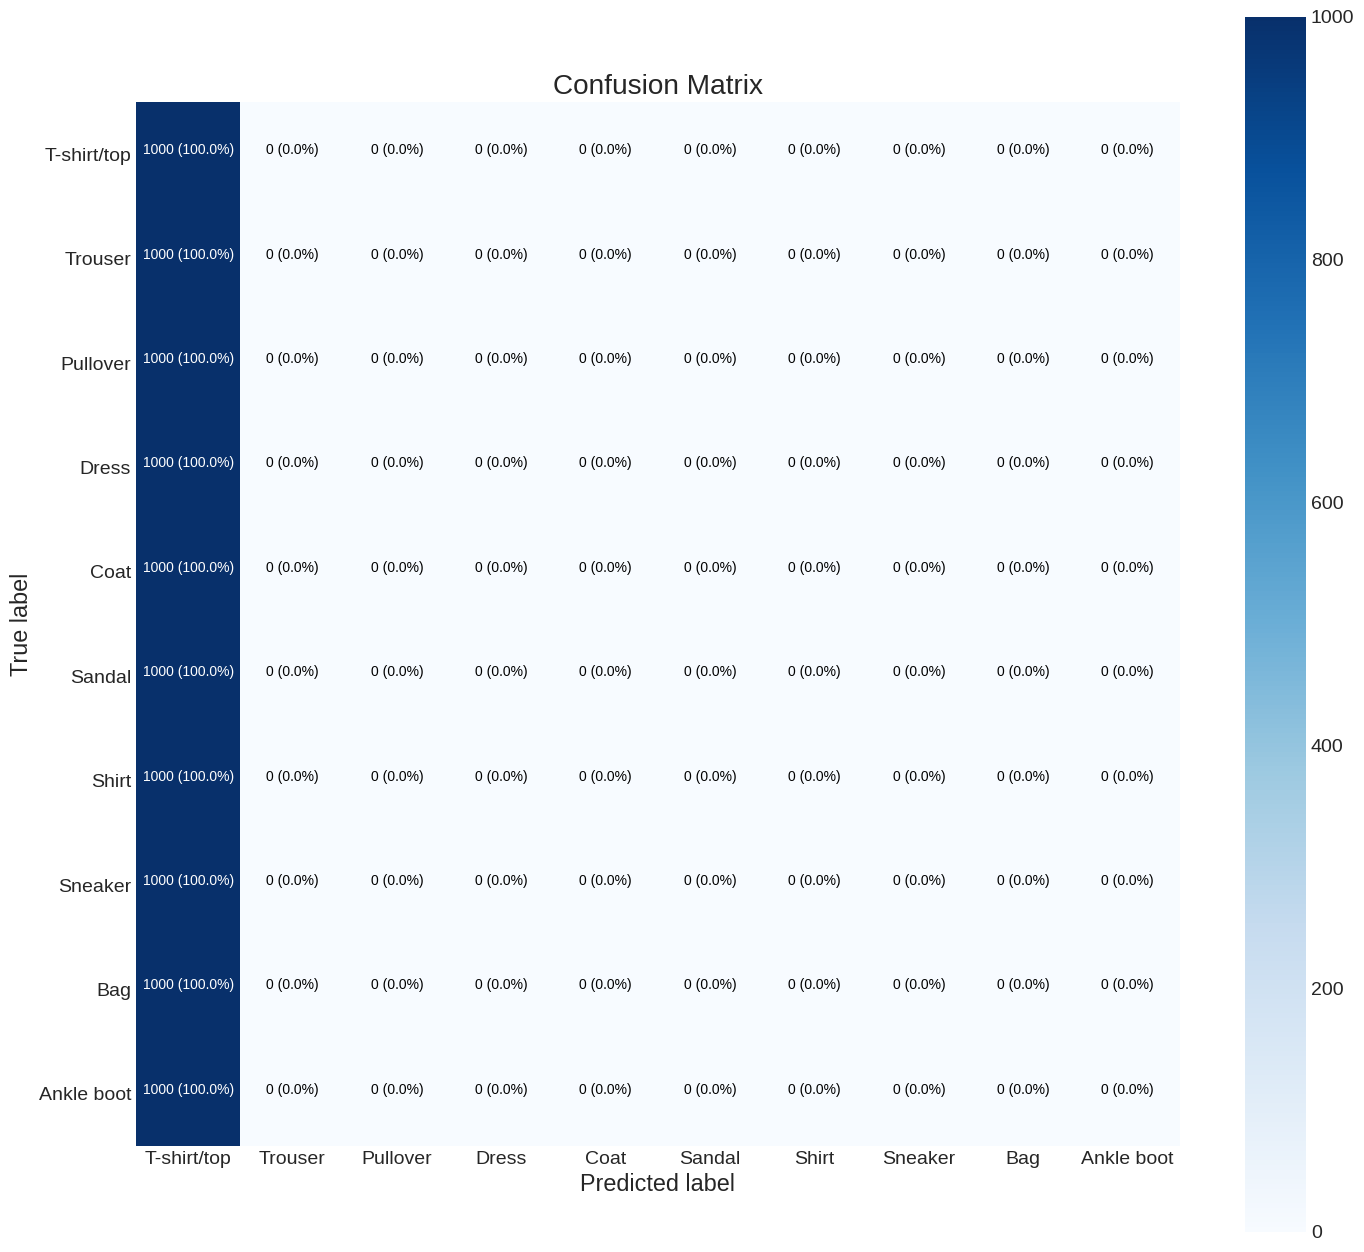

In [81]:
plt.style.use('seaborn-dark')
make_confusion_matrix(y_true=y_test,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)

In [82]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 51ms/step


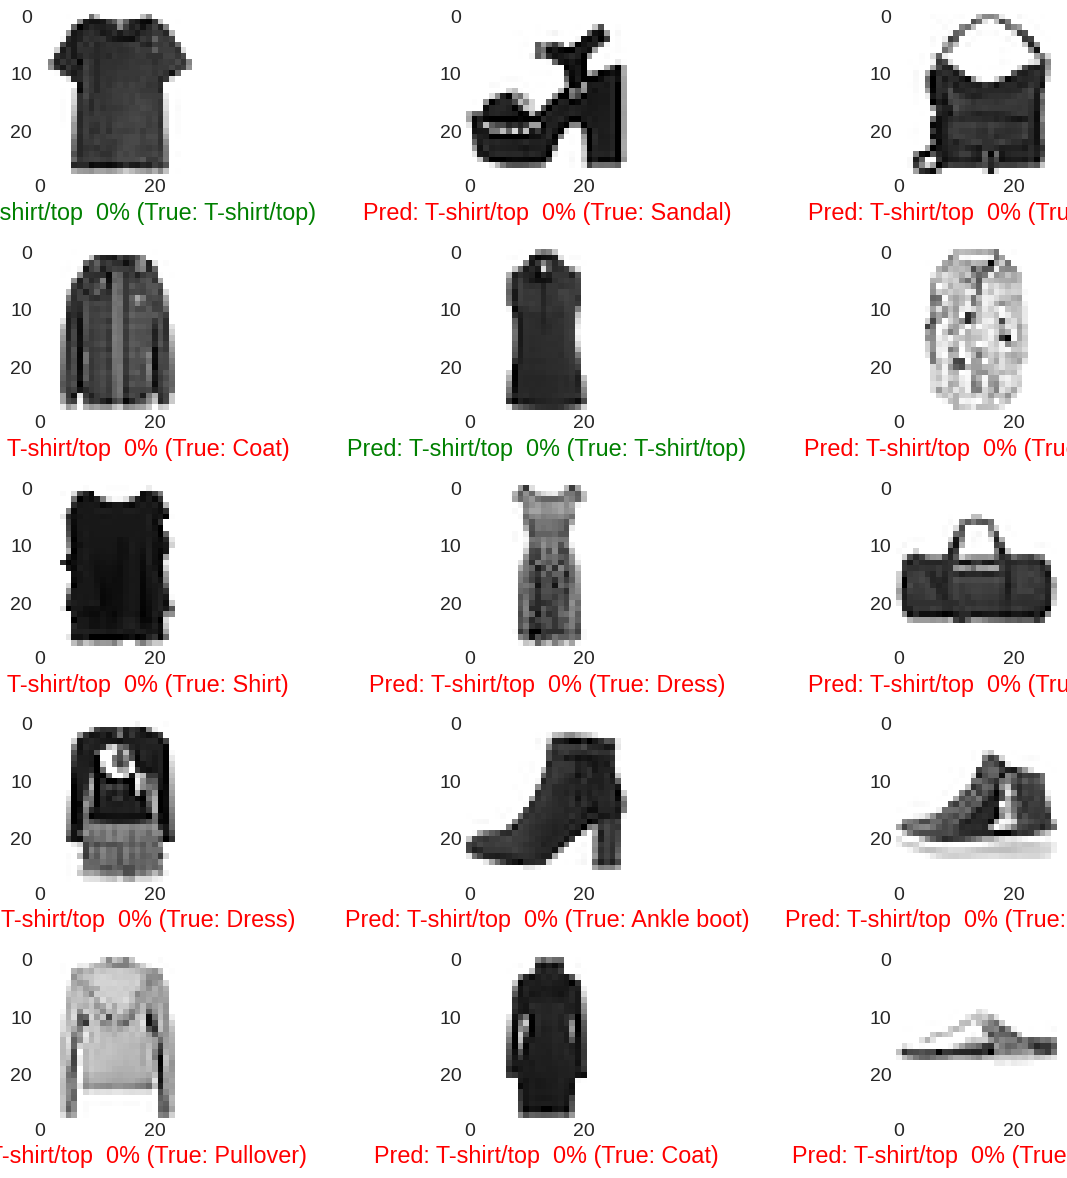

In [84]:
plt.figure(figsize = (15, 12))
plotnumber = 1

for i in range(15):
    if plotnumber <= 15:
        ax = plt.subplot(5, 3, plotnumber)
        plot_random_image(model=model,
                  images=x_test,
                  true_labels=y_test,
                  classes=class_names)

    plotnumber += 1

plt.tight_layout()
plt.show()

In [86]:
x_new=x_test[:5]
y_proba=model.predict(x_new)
y_proba.round(2)

1/1 [==============================] - 0s 24ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [88]:
y_pred=model.predict(x_new)
y_pred

1/1 [==============================] - 0s 48ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [101]:
import numpy as np

# Example data (replace with your actual data)
class_names = ['Pullover', 'Shirt', 'Ankle boot']
y_pred = np.array([0, 1, 2, 0, 1])  # Replace with your predicted labels

# Ensure y_pred contains integer values
y_pred = y_pred.astype(int)

# Now you can use y_pred to index class_names
predicted_classes = np.array(class_names)[y_pred]
print(predicted_classes)


['Pullover' 'Shirt' 'Ankle boot' 'Pullover' 'Shirt']


In [102]:
np.array(class_names)[y_pred]

array(['Pullover', 'Shirt', 'Ankle boot', 'Pullover', 'Shirt'],
      dtype='<U10')

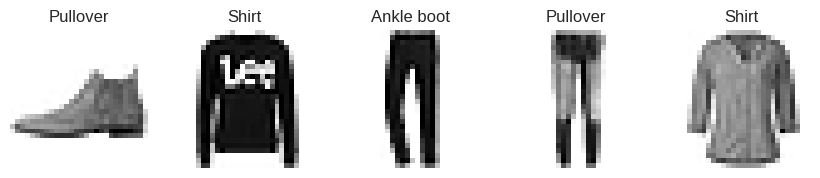

In [104]:
y_new = y_test[:5]
plt.figure(figsize=(9.2, 4.4))
for index, image in enumerate(x_new):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()